In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [33]:
all_data = pd.read_csv("./alignment_output.csv")
all_data = all_data.drop(
    labels=[
        "run",
        "operation",
        "started",
        "time",
        "status",
        "label",
        "data_location",
        "dataset",
        "gpu",
        "step",
        "postprune_epochs",
        "preprune_epochs",
        "save_path",
    ],
    axis=1,
)
print(all_data.columns)
display(all_data.head())
print("Pruners:", " ".join(all_data["pruner"].unique()))
print("Blockers:", " ".join(all_data["blocker"].unique()))


Index(['blocker', 'model', 'pruner', 'sparsity', 'Accuracy/postprune',
       'Loss/postprune', 'Sparsity', 'alignment_score', 'best_post_acc',
       'best_post_loss', 'best_pre_acc', 'best_pre_loss', 'immediate_post_acc',
       'immediate_post_loss'],
      dtype='object')


,blocker,model,pruner,sparsity,Accuracy/postprune,Loss/postprune,Sparsity,alignment_score,best_post_acc,best_post_loss,best_pre_acc,best_pre_loss,immediate_post_acc,immediate_post_loss
0,none,vgg16,magnitude,0.89,0.1,2.302587,0.9326,8.696154,0.1,2.302497,0.9352,0.31292,0.1,2.311329
1,none,vgg16,magnitude,0.93,0.1,2.302584,0.9609,8.661328,0.1,2.302532,0.9352,0.31292,0.1,2.311329
2,none,vgg16,magnitude,0.96,0.1,2.302584,0.9789,8.741880,0.1,2.302525,0.9352,0.31292,0.1,2.311329
3,none,vgg16,magnitude,0.98,0.1,2.302583,0.9911,8.669718,0.1,2.302531,0.9352,0.31292,0.1,2.311329
4,none,vgg16,magnitude,0.99,0.1,2.302586,0.9965,8.688623,0.1,2.302511,0.9352,0.31292,0.1,2.311329


Pruners: magnitude relative_error alignment_output_sampling_proportional alignment_output_sampling alignment_output
Blockers: none alds square


In [34]:
all_data[all_data["pruner"] != "magnitude"].sort_values(by="best_post_acc")

,blocker,model,pruner,sparsity,Accuracy/postprune,Loss/postprune,Sparsity,alignment_score,best_post_acc,best_post_loss,best_pre_acc,best_pre_loss,immediate_post_acc,immediate_post_loss
48,alds,vgg16,alignment_output,0.98,0.1000,2.302581,0.9813,8.679155,0.1000,2.302550,0.9352,0.31292,0.1000,2.350634
49,alds,vgg16,alignment_output,0.99,0.1000,2.302587,0.9934,8.678673,0.1000,2.302538,0.9352,0.31292,0.1000,2.315426
10,none,vgg16,alignment_output_sampling_proportional,0.89,0.1000,2.302585,0.9080,8.705910,0.1000,2.302532,0.9352,0.31292,0.1000,2.302540
64,square,vgg16,alignment_output_sampling_proportional,0.99,0.1000,2.302587,0.9862,9.197806,0.1000,2.302539,0.9352,0.31292,0.1000,2.747895
24,none,vgg16,alignment_output,0.99,0.1000,2.302588,0.9939,8.704172,0.1000,2.302528,0.9352,0.31292,0.1000,2.320972
23,none,vgg16,alignment_output,0.98,0.1000,2.302583,0.9835,8.877616,0.1000,2.302490,0.9352,0.31292,0.1000,2.409915
19,none,vgg16,alignment_output_sampling,0.99,0.1000,2.302586,0.9933,8.645129,0.1000,2.302479,0.9352,0.31292,0.1000,2.303457
9,none,vgg16,relative_error,0.99,0.5355,1.273295,0.9929,8.657085,0.5393,1.265393,0.9352,0.31292,0.1000,2.308903
14,none,vgg16,alignment_output_sampling_proportional,0.99,0.5834,1.169577,0.9928,8.728745,0.5867,1.164529,0.9352,0.31292,0.1000,2.307798
18,none,vgg16,alignment_output_sampling,0.98,0.6070,1.376557,0.9840,8.681808,0.6104,1.322173,0.9352,0.31292,0.1000,2.309712


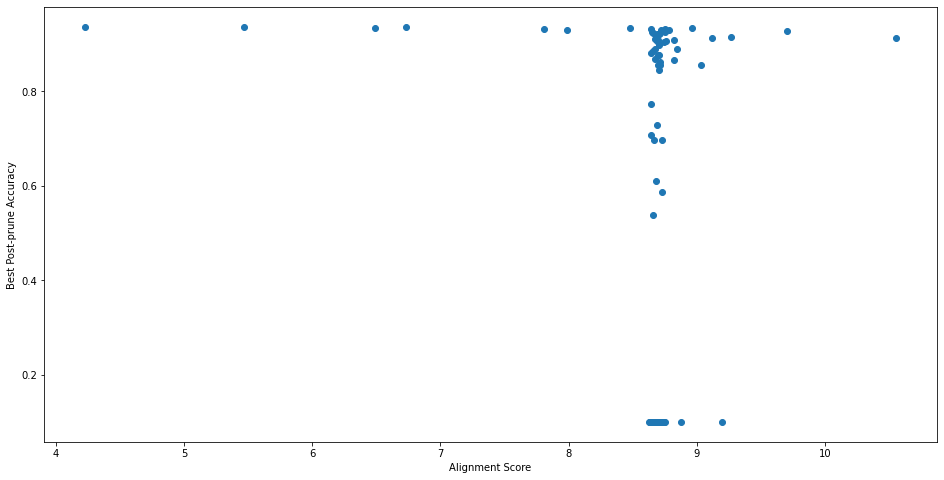

In [49]:
# data = all_data[(all_data["Sparsity"] < 0.90) & (all_data["pruner"] != "magnitude")]
data = all_data
plt.figure(figsize=(16, 8))
plt.scatter(data["alignment_score"], data["best_post_acc"])
plt.xlabel("Alignment Score")
plt.ylabel("Best Post-prune Accuracy")
plt.show()

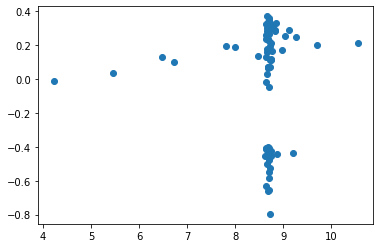

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          best_post_acc   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     4.907
Date:                Sat, 28 May 2022   Prob (F-statistic):             0.0100
Time:                        14:01:09   Log-Likelihood:                -24.983
No. Observations:                  75   AIC:                             55.97
Df Residuals:                      72   BIC:                             62.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.2496      0.840      3.867      0.000       1.574       4.925
Sparsity           -2.8407      0.990     -2.868      0.005      -4.815      -0.867
alignment_score     0.0095      0.057      0.166      0.869      -0.105       0.124
==============================================================================
Omnibus:                       14.351   Durbin-Watson:                   0.598
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.303
Skew:                          -0.780   Prob(JB):                      0.00579
Kurtosis:                       2.072   Cond. No.                         274.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# data = all_data[(all_data["Sparsity"] < 1) & (all_data["pruner"] != "magnitude")]
data = all_data
est = sm.OLS(data["best_post_acc"], sm.add_constant(data[["Sparsity", "alignment_score"]])).fit()
plt.scatter(data["alignment_score"], data["best_post_acc"] - est.fittedvalues)
plt.show()
est.summary()